In [2]:
import pandas as pd
from pymongo import MongoClient
import sklearn

MONGOHOST = "localhost:27017"
MONGODB = "lod_notebook"

client = MongoClient(MONGOHOST)
db_connect = client[MONGODB]

cur = db_connect["area_data"].find()
df = pd.DataFrame(list(cur))

In [15]:
# row, col
df.shape

(4107, 39)

In [59]:
# このような集計結果を全カラム（文字列などは例外）に渡って人口あたりの値に変換する。この値はseriesとして返る
df.female.astype(float) /df.total.astype(float)

0       0.517865
1       0.510829
2       0.520131
3       0.527115
4       0.531523
5       0.517309
6       0.509724
7       0.520909
8       0.528257
9       0.504900
10      0.517312
11      0.517432
12      0.515074
13      0.530194
14      0.535861
15      0.503648
16      0.537136
17      0.488597
18      0.525420
19      0.494532
20      0.533111
21      0.526141
22      0.520983
23      0.515205
24      0.519448
25      0.537271
26      0.521082
27      0.506480
28      0.535684
29      0.536246
          ...   
4077    0.534657
4078    0.520315
4079    0.501329
4080    0.522809
4081    0.526033
4082    0.499623
4083    0.509791
4084    0.501065
4085    0.532123
4086    0.545741
4087    0.522208
4088    0.526212
4089    0.507183
4090    0.518432
4091    0.529926
4092    0.494423
4093    0.515917
4094    0.485298
4095    0.528360
4096    0.505465
4097    0.521978
4098    0.474606
4099    0.519657
4100    0.501916
4101    0.525466
4102    0.524653
4103    0.496088
4104    0.5085

In [18]:
df_pp = pd.DataFrame()
for k, v in df.iteritems():
    try:
        s = df[k].astype(float)/df.total.astype(float)
        df_pp[k] = s
    except:
        df_pp[k] = df[k]
    df_pp["total"] = df["total"]
    
#  村など病院数などの値が取得できない=NaNとなるデータを含めないための処理
df_pp = df_pp[df_pp.byoin.notnull()]
df_pp["_id"] = df_pp["_id"].map(lambda x: x[33:-1])
df_pp

,_id,total,byoin,city,female,hoikusyo,hyakkaten,insyokuten,ishi,jidou_fukushi,...,syussei,taikukara_tuukin,tatikuhe_tuukin,tennyuu,tensyutsu,tyuugaku,tyuugaku_kyoin,tyuugaku_seito,yochien,yochien_zaien
0,C36204-2006032,75512,0.000079,阿南市,0.517865,0.000384,0.000013,0.003470,0.001867,0.000477,...,0.007628,0.099031,0.095786,0.020460,0.022553,0.000146,0.002794,0.030419,0.000185,0.007800
2,C17407-2009090,18380,0.000000,中能登町,0.520131,0.000326,0.000054,0.003210,0.000381,0.000544,...,0.008433,0.094668,0.239010,0.014527,0.010337,0.000054,0.002013,0.028074,0.000054,0.000000
4,C42202-2016040,258085,0.000077,佐世保市,0.531523,0.000240,0.000012,0.004723,0.002550,0.000287,...,0.009268,0.050406,0.039871,0.020520,0.016808,0.000112,0.002189,0.029370,0.000147,0.013391
5,C27205-2001040,350771,0.000037,吹田市,0.517309,0.000114,0.000011,0.003227,0.006560,0.000171,...,0.009337,0.213578,0.265367,0.053437,0.047909,0.000057,0.001842,0.030992,0.000094,0.018913
7,C01212-1970040,24344,0.000082,留萌市,0.520909,0.000041,0.000000,0.007928,0.002300,0.000246,...,0.006696,0.039887,0.027111,0.017992,0.058248,0.000123,0.002424,0.021073,0.000082,0.010105
8,C17386-2006080,14156,0.000071,宝達志水町,0.528257,0.000353,0.000000,0.002049,0.000565,0.000494,...,0.004309,0.127578,0.239474,0.005369,0.019780,0.000141,0.002684,0.032354,0.000000,0.000000
9,C13222-1985020,115500,0.000017,東久留米市,0.504900,0.000139,0.000017,0.002303,0.000571,0.000190,...,0.007455,0.106883,0.278113,0.020892,0.039411,0.000078,0.001671,0.025463,0.000069,0.014468
11,C04444-1991040,7400,0.000135,色麻町,0.517432,0.000270,0.000000,0.002027,0.000811,0.000405,...,0.005270,0.164189,0.259324,0.023243,0.024324,0.000135,0.002973,0.027973,0.000270,0.010676
12,C20452-2005101,5108,0.000000,筑北村,0.515074,0.000587,0.000000,0.002349,0.000979,0.000783,...,0.003915,0.058340,0.236883,0.022318,0.029170,0.000196,0.002741,0.014879,0.000000,0.000000
15,C07484-1998060,3975,0.000000,鮫川村,0.503648,0.000000,0.000000,0.001509,0.000000,0.000000,...,0.005283,0.084528,0.209811,0.009057,0.017862,0.000252,0.003270,0.025660,0.000252,0.007044


In [21]:
df_pp.shape

(1954, 39)

In [20]:
# 全く関係ないけど人口の男性がしめる割合をソートしてみて見た
df_pp.loc[:, ["male","pref", "city","total"]].sort_values("male")

,male,pref,city,total
1441,0.421500,京都府,東山区,39312
1402,0.440468,福岡県,中央区,167270
2993,0.444948,和歌山県,古座川町,3088
72,0.446629,北海道,歌志内市,4375
124,0.447135,山口県,阿武町,3717
1065,0.447364,北海道,上ノ国町,5405
3864,0.448307,北海道,神恵内村,1122
1044,0.448315,高知県,奈半利町,3531
3908,0.448358,静岡県,熱海市,39348
2157,0.449571,北海道,上砂川町,4075


In [30]:
# dataのStandarizationのために文字列のカラムをソートして先頭にはずしておきます
df_pp = df_pp.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_pp.sort_index(axis=1, inplace=True)
df_pp.fillna(0, inplace=True)
df_pp.ix[:,3:] 

,byoin,female,hoikusyo,hyakkaten,insyokuten,ishi,jidou_fukushi,jidou_taiki,jidou_zaisyo,jitiku_syuugyo,...,syussei,taikukara_tuukin,tatikuhe_tuukin,tennyuu,tensyutsu,tyuugaku,tyuugaku_kyoin,tyuugaku_seito,yochien,yochien_zaien
0,0.230975,0.125081,0.724225,0.280140,-0.255513,0.068470,0.786761,-0.265117,1.021291,0.497511,...,0.219527,-0.178143,-0.923329,-0.136448,-0.136222,-0.106294,-0.042659,0.507821,0.406800,-0.184552
2,-0.983195,0.256179,0.435454,2.747127,-0.318206,-0.684580,1.108815,-0.265117,2.309172,-0.414138,...,0.578106,-0.188561,0.641745,-0.539387,-1.052555,-0.322287,-0.309730,0.152066,-0.415841,-1.334982
4,0.200967,0.915297,0.003269,0.183121,0.047190,0.414137,-0.122215,-0.265117,0.271796,1.093980,...,0.950059,-0.294266,-1.534344,-0.132370,-0.567128,-0.185118,-0.249511,0.348705,0.167139,0.640039
5,-0.416873,0.092929,-0.629368,0.169898,-0.314061,2.445850,-0.675564,0.882064,-0.421678,-1.144506,...,0.980482,0.095412,0.929761,2.102882,1.765852,-0.316109,-0.368327,0.594708,-0.166704,1.454430
7,0.272205,0.301197,-0.995108,-0.513518,0.821038,0.287893,-0.314804,-0.265117,-1.335839,1.449892,...,-0.195646,-0.319387,-1.673770,-0.304057,2.541480,-0.159398,-0.169379,-0.910041,-0.241579,0.155422
8,0.096257,0.726333,0.569632,-0.513518,-0.598648,-0.591218,0.871644,-0.265117,1.157663,-0.580136,...,-1.258514,-0.109967,0.646822,-1.161277,-0.344246,-0.116682,-0.080226,0.801339,-0.757516,-1.334982
9,-0.718594,-0.625007,-0.506579,0.524242,-0.537212,-0.588028,-0.582645,2.878310,-0.376167,-1.288736,...,0.142311,-0.159390,1.069039,-0.107149,1.128416,-0.266635,-0.426671,-0.244009,-0.322538,0.798826
11,1.081769,0.100070,0.153860,-0.513518,-0.603857,-0.466751,0.445497,-0.265117,-0.279441,-0.351537,...,-0.830465,-0.022536,0.863731,0.052533,-0.003325,-0.131231,0.018438,0.136741,0.939779,0.239567
12,-0.983195,-0.036362,1.743236,-0.513518,-0.526050,-0.381614,2.252177,-0.265117,0.167514,0.002636,...,-1.433850,-0.275318,0.618508,-0.010302,0.360166,0.012273,-0.060936,-1.849765,-0.757516,-1.334982
15,-0.983195,-0.697482,-1.201036,-0.513518,-0.728839,-0.877528,-1.493812,-0.265117,-1.750479,-0.172401,...,-0.824787,-0.212777,0.322679,-0.910844,-0.488121,0.144334,0.120134,-0.214096,0.822356,-0.296063


In [36]:
# 数値データを標準化
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_pp.ix[:,3:] = scale.fit_transform(df_pp.ix[:,3:])
df_pp

,_area,_city,_pref,_total,byoin,female,hoikusyo,hyakkaten,insyokuten,ishi,...,syussei,taikukara_tuukin,tatikuhe_tuukin,tennyuu,tensyutsu,tyuugaku,tyuugaku_kyoin,tyuugaku_seito,yochien,yochien_zaien
0,C36204-2006032,阿南市,徳島県,-0.112917,0.230975,0.125081,0.724225,0.280140,-0.255513,0.068470,...,0.219527,-0.178143,-0.923329,-0.136448,-0.136222,-0.106294,-0.042659,0.507821,0.406800,-0.184552
2,C17407-2009090,中能登町,石川県,-0.205509,-0.983195,0.256179,0.435454,2.747127,-0.318206,-0.684580,...,0.578106,-0.188561,0.641745,-0.539387,-1.052555,-0.322287,-0.309730,0.152066,-0.415841,-1.334982
4,C42202-2016040,佐世保市,長崎県,0.182974,0.200967,0.915297,0.003269,0.183121,0.047190,0.414137,...,0.950059,-0.294266,-1.534344,-0.132370,-0.567128,-0.185118,-0.249511,0.348705,0.167139,0.640039
5,C27205-2001040,吹田市,大阪府,0.333187,-0.416873,0.092929,-0.629368,0.169898,-0.314061,2.445850,...,0.980482,0.095412,0.929761,2.102882,1.765852,-0.316109,-0.368327,0.594708,-0.166704,1.454430
7,C01212-1970040,留萌市,北海道,-0.195843,0.272205,0.301197,-0.995108,-0.513518,0.821038,0.287893,...,-0.195646,-0.319387,-1.673770,-0.304057,2.541480,-0.159398,-0.169379,-0.910041,-0.241579,0.155422
8,C17386-2006080,宝達志水町,石川県,-0.212355,0.096257,0.726333,0.569632,-0.513518,-0.598648,-0.591218,...,-1.258514,-0.109967,0.646822,-1.161277,-0.344246,-0.116682,-0.080226,0.801339,-0.757516,-1.334982
9,C13222-1985020,東久留米市,東京都,-0.048109,-0.718594,-0.625007,-0.506579,0.524242,-0.537212,-0.588028,...,0.142311,-0.159390,1.069039,-0.107149,1.128416,-0.266635,-0.426671,-0.244009,-0.322538,0.798826
11,C04444-1991040,色麻町,宮城県,-0.223304,1.081769,0.100070,0.153860,-0.513518,-0.603857,-0.466751,...,-0.830465,-0.022536,0.863731,0.052533,-0.003325,-0.131231,0.018438,0.136741,0.939779,0.239567
12,C20452-2005101,筑北村,長野県,-0.227018,-0.983195,-0.036362,1.743236,-0.513518,-0.526050,-0.381614,...,-1.433850,-0.275318,0.618508,-0.010302,0.360166,0.012273,-0.060936,-1.849765,-0.757516,-1.334982
15,C07484-1998060,鮫川村,福島県,-0.228855,-0.983195,-0.697482,-1.201036,-0.513518,-0.728839,-0.877528,...,-0.824787,-0.212777,0.322679,-0.910844,-0.488121,0.144334,0.120134,-0.214096,0.822356,-0.296063


In [9]:
# データをMinMaxScalerで正規化した場合
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_pp.ix[:,3:] = mms.fit_transform(df_pp.ix[:,3:])

(1954, 2)

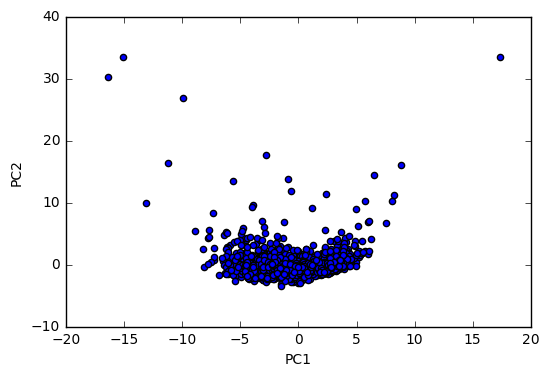

In [40]:
# 主成分分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(df_pp.ix[:,3:]), columns=('PC1', 'PC2'))
pca_df.plot(kind='scatter', x='PC1', y='PC2')
pca_df.shape
